In [1]:
%load_ext autoreload

- RunB 6um
- RunD 20um
- RunE 50um particles

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [3]:
from monetio.models import hysplit

In [4]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
from utilvolc import ashapp

In [5]:
from utilvolc.ashapp import ashinverse

In [6]:
os.chdir('/hysplit-users/alicec/projects/bezy/notebooks/')
projdir = os.getcwd().replace('notebooks','')

vloc = [160.587,55.978]
tag ='P'
#ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
#ens.append('gec00')
#ens=['gep04','gep03']
ens=['B','D','E']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = os.path.join(projdir,'data')
fnamelist  = ['xrfile.invbezy{}.nc'.format(x) for x in ens]
tdirlist = [tdir for x in ens]

#----------------------------------------------------------------
configdir = os.path.join(projdir,'Run{}'.format(tag))
configfile = 'config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
vdir = os.path.join(projdir,'data','volcat')
# volcano id to locate
vid = 'v300250'
#-----------------------------------------------------------------
# Location of inverse algorithm output
#wpath = os.getcwd()
wdir = os.path.join(projdir,'Run{}'.format(tag))
#print(wpath)
#cdir = '../Run{}/'.format(tag)
#wdir = '../Run{}/'.format(tag,tag)
#sdir = os.path.join(wdir,'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------

# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
#

execdir = os.path.join(projdir,'Inverse_240')
hysplitdir = os.path.join(projdir,'hysplit')
#execdir = mdir+'/Inverse_'
print(execdir, hysplitdir)
print(vdir)
#

datadir = os.path.join(projdir, 'data')

/hysplit-users/alicec/projects/bezy/Inverse_240 /hysplit-users/alicec/projects/bezy/hysplit
/hysplit-users/alicec/projects/bezy/data/volcat


In [7]:
temp = xr.open_dataset(tdirlist[0]+'/'+fnamelist[0])

In [8]:
temp = temp[list(temp.data_vars.keys())[0]]
temp.rename('pall')

<xarray.DataArray 'pall' (source: 1, ens: 66, time: 17, z: 10, y: 110, x: 87)>
[107375400 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715 15239
  * y          (y) int64 376 377 378 379 380 381 382 ... 480 481 482 483 484 485
  * x          (x) int64 866 867 868 869 870 871 872 ... 947 948 949 950 951 952
  * ens        (ens) object '102119_2880' '102119_3880' ... '102200_12880'
  * source     (source) object 'Line to 14 km'
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes: (12/40)
    mult:                     1
    HYSPLIT_DIR:              /hysplit-users/alicec/FBamcArea/
    MAP_DIR:                  /hysplit-users/alicec/hysplit.v5.0.0/graphics/
    WORK_DIR:                 /hysplit-users/alicec/tmp/
    CONVERT_EXE:              convert
    PYTHON_EXE:               /hysplit-users/alicec/anaconda3/envs/hysplit/bi...
    ...                       ...
    spatialPlotRadius:        500.0
    graphicsResolution:       200
    zip_compression_level:    3
    rate:                     1
    timeres:                  1
    inv_vertical_resolution:  1000

# Create Instance of InverseAshPartEns

In [58]:
%autoreload
inverse = ai.InverseAshPartEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile)

appending  ('/hysplit-users/alicec/projects/bezy/data', 'xrfile.invbezyB.nc')
appending  ('/hysplit-users/alicec/projects/bezy/data', 'xrfile.invbezyD.nc')
appending  ('/hysplit-users/alicec/projects/bezy/data', 'xrfile.invbezyE.nc')
p060
<class 'xarray.core.dataarray.DataArray'>
p200
<class 'xarray.core.dataarray.DataArray'>
p500
<class 'xarray.core.dataarray.DataArray'>


In [72]:
inverse.invlist[0].phash
inverse.add_phash()
inverse.phash

{'p060': 1, 'p200': 2, 'p500': 3}

In [73]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,10):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [74]:
#print(inverse.invlist[0].get_time(2))
print(inverse.invlist[0].get_time(4))

2020-10-21 23:00:00


In [75]:
%autoreload
inverse.set_directory(wdir,execdir,datadir,hysplitdir)
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunP
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunP
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [76]:
inverse.invlist[0].cdump.z.values[1:]

array([ 3047,  4571,  6095,  7619,  9143, 10667, 12191, 13715, 15239])

In [77]:
# add in the relavant VOLCAT observations
%autoreload
zvals = list(inverse.invlist[0].cdump.z.values[0:])
#dlist = [[datetime.datetime(2020,10,22,9),datetime.datetime(2020,10,22,10)]]
for drange in dlist:
    print(drange)
    inverse.prepare_one_time(drange,zvals=zvals)

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


10 P
tii 10


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


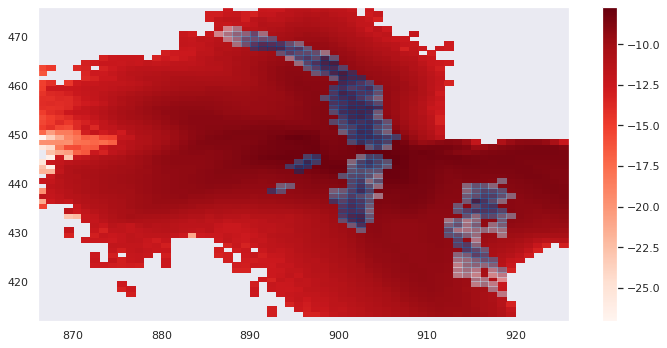

In [67]:
%autoreload
#gep10, gep16 looks good at tii=6.
#gep24 possibly looks ok.
zlevel=None  #index 'ensemble'
           #if None then sum along the ens. dimension which shows contributions from all inv. runs.
tii=10
#zlevel=None
%autoreload
ax = inverse.compare_plotsA(daterange=dlist[0],tii=tii,zii=zlevel)
#plt.gca()
#ax.plot(160.587,55.978,'y^')
#plt.show()


# Automatic Runs

In [70]:
def makerun(inverse, tii,remove_cols, remove_rows, remove_sources,remove_ncs):
    print("Running makerun ")
    inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
    runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    inverse.set_subdirectory(runtag)
    print('Using subdirectory ', inverse.subdir)
    tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
    inverse.run_tcm()
    
    eii=None
    unit='g/h'
    unit='kg/s'
    inverse.plot_outdat_ts(eii,unit=unit)
    #plt.show()
    #inverse.plot_outdat_ts(eii,profile=True)
    inverse.save_emis(runtag+'.csv')


## Run with all previous and just two previous

In [78]:
inverse.phash

{'p060': 1, 'p200': 2, 'p500': 3}

In [ ]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.

%autoreload

tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    #print('tii', tii)
    makerun(inverse, tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    #inverse.make_efile(vloc=vloc)
    #inverse.run_hysplit()

tiilist = [[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11]]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    print(tii)
    makerun(inverse, tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    #inverse.make_efile(vloc=vloc)
    #inverse.run_hysplit()

Running makerun 
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
Using subdirectory  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1094: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1095: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

run_tcm tag P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2279: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1094: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1095: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
Running makerun 
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
Using subdirectory  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5
run_tcm tag P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:770: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2279: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1094: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/RunP_2_3_4_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/RunP_2_3_4_TFw5.csv
Running makerun 
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
Using subdirectory  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5


## For comparision with RunC

HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1091: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2276: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1091: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:768: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2276: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1091: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/RunP_2_3_4_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/RunP_2_3_4_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:768: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2276: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1091: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/RunP_2_3_4_5_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/RunP_2_3_4_5_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:768: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2276: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1091: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5/RunP_2_3_4_5_6_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5/RunP_2_3_4_5_6_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:768: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2276: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1091: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5/RunP_2_3_4_5_6_7_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5/RunP_2_3_4_5_6_7_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:768: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2276: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1091: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5/RunP_2_3_4_5_6_7_8_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5/RunP_2_3_4_5_6_7_8_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:768: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2276: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1091: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5/RunP_2_3_4_5_6_7_8_9_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5/RunP_2_3_4_5_6_7_8_9_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)


P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:768: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:2276: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1091: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
length 1
self subdir is /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5
saving emissions in  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5/RunP_2_3_4_5_6_7_8_9_10_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5/RunP_2_3_4_5_6_7_8_9_10_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)


HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw5
P


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-d8aebf45d114>", line 10, in <module>
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
  File "<ipython-input-29-e3b6aed82ed2>", line 8, in makerun
    inverse.run_tcm()
  File "/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py", line 625, in run_tcm
    Helper.execute(cmd)
  File "/hysplit-users/alicec/utilhysplit/utilvolc/runhelper.py", line 58, in execute
    stdoutdata, stderrdata = p.communicate()
  File "/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/subprocess.py", line 1016, in communicate
    self.wait()
  File "/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/subprocess.py", line 1079, in wait
    return self._wait(timeout=timeout)
  File "/hysplit-users/alicec/anaconda3/envs/paris/lib/

TypeError: object of type 'NoneType' has no len()

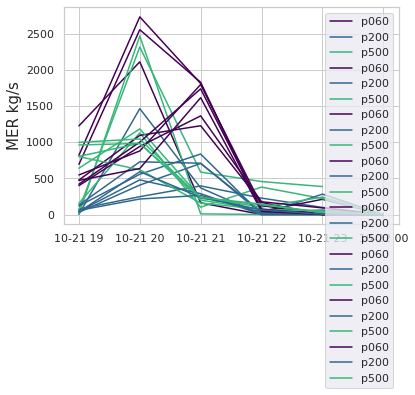

In [31]:
%autoreload
tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11],
           [4,5,6]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=True
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=False
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    
    
tiilist = [[7,8],[9,10,11],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=7
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=True
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=False
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)  
    

# Looking at individual inversions

In [ ]:
%autoreload
#tii = [2,3,4,5,6,7,8]  #times to assimilate in inversion algorithm.
tii = [2,3,4,5,6,7,8]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
#remove_sources = ['12880']  # this would remove top vertical level from consideration.
#inverse.make_tcm_mult([1,2,3,4],remove_cols=True,remove_rows=False,remove_sources=['12880'])
inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)

# set the subdirectory for this TCM run.
#subdir = inverse.set_sub_directory(runtag)
#print('setting subdirectory {}'.format(subdir))

In [ ]:
print(runtag)

In [ ]:
numpar = 20000  # number of particles released per hour.
delt = 5 # time step
tave = 1 # 1 h time average
hres = 0.1 # 0.1 degree horizontal resolution.
rate = 1 # 1 unit mass per hour
particle_mass = rate / numpar  #how much unit mass each particle has
area = (hres * 111e3)**2  # area in meters squared for mass loading grid.
mass_one = particle_mass / area  # unit mass / m2 for one particle in grid box.
mass_one_one = mass_one / (tave*60 / delt)  # smallest mass loading possible with one particle for one time step
print(mass_one_one)  # one particle for one time step
print(mass_one)      # one particle in area.

In [ ]:
%autoreload
inverse.plot_tcm()
inverse.invlist[0].tcm.shape


In [ ]:
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.set_subdirectory(runtag)
#subdir='/hysplit-users/alicec/projects/bezy/RunP/' + runtag
#subdir

In [ ]:
%autoreload
tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
#print(tcmstr)

In [ ]:
%autoreload
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.run_tcm()

In [ ]:
# Now run the inverse model.

# open the Parameters_in.dat file and set N_ctrl, Nx_ctrl and lbfgs_nbd to
# the number shown for N_ctrl above.

# copy the tcm file to TCM_sum.csv

# run new_lbfgsb.x

In [ ]:
%autoreload
inverse.plot_outdat(eii=0)

In [ ]:
%autoreload
print(runtag)
print(os.getcwd())
eii=0
unit='g/h'
unit='kg/s'
fig = plt.figure()
ax = inverse.plot_outdat_ts(eii,unit=unit)
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles,['6$\mu$m','20$\mu$m','50$\mu$m'])
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig('EmissionsTime_' + runtag + '.png')
plt.show()

#fig = plt.figure(size=[10,5])
inverse.plot_outdat_ts(eii,profile=True)
plt.tight_layout()
plt.savefig('EmissionsHeight_' + runtag + '.png')
#inverse.save_emis(runtag+'.csv')
#ax = plt.gca()
#ax.set_ylim(0,10000)

In [ ]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=0
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))


In [ ]:
df = ilist[iii].get_emis()

In [ ]:
dfdat = inverse.invlist[0].make_outdat_df(df,part='basic')
dtest = dfdat.groupby(['date','ht']).sum()
dtest.reset_index()
#dfdat.pivot(columns='date',index='ht')

# checking the directories

In [ ]:
%autoreload
inverse.print_directories()

# Working on making EMIT file

In [ ]:
%autoreload
inverse.add_phash()

In [ ]:
inverse.phash.values()

In [ ]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.
efile = inverse.make_efile(vloc=vloc)
efile.write_new('test.txt')

In [ ]:
%autoreload
ecycle = efile.cycle_list[-1]
ecycle.sort()
print(ecycle.splist)
erec = ecycle.recordra
for iii in np.arange(0,len(erec)):
    print(erec[iii].spnum, '---', erec[iii],type(erec[iii].spnum))
#efile.write_new('temp.txt')

In [ ]:
%autoreload
efile.write_new('efile.test')

In [ ]:
%autoreload
inverse.run_hysplit()